# Weather Maps

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# API keys
from config import api_key

In [2]:
# these next to cells i got from the starter code to generate list of cities to use
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
towns = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in towns:
        towns.append(city)

# Print the city count to confirm sufficient count
len(towns)

637

In [4]:
# setting my search paramaters
# towns = ['st. paul', 'albany', 'st. louis', 'miami', 'portland']
units = 'imperial'
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

In [5]:
# running thru my list of cities and grabbing the data i want
cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

rec_num = 0
set_num = 0

print('Beginning Data Calls.')
print('-----------------------')

for city in towns:
    
    city_url = f"{base_url}q={city}&units={units}&appid={api_key}"
    response = requests.get(city_url)
    city_json = response.json()
    
    # sleep for one second to avoid requesting more than 60 per min
    time.sleep(1)
    
    # i want city, lat, lng, max temp, humidity, cloudiness, windspeed, country, date
    try:
        cities.append(city_json['name'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        humidity.append(city_json['main']['humidity'])
        cloudiness.append(city_json['clouds']['all'])
        wind_speed.append(city_json['wind']['speed'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
        
        if rec_num < 49:
            rec_num += 1
        else:
            rec_num = 0
            set_num +=1

        print(f'Processing Record {rec_num} of Set {set_num} | {city}')
        
    except:
        print('City not found Skipping.')
        

        
        
weather_dict = {
    'City': cities,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

weather_df = pd.DataFrame(weather_dict)

Beginning Data Calls.
-----------------------
Processing Record 1 of Set 0 | port alfred
City not found Skipping.
Processing Record 2 of Set 0 | hermanus
Processing Record 3 of Set 0 | hit
City not found Skipping.
Processing Record 4 of Set 0 | ushuaia
City not found Skipping.
Processing Record 5 of Set 0 | busselton
Processing Record 6 of Set 0 | sorland
Processing Record 7 of Set 0 | nago
City not found Skipping.
Processing Record 8 of Set 0 | albany
Processing Record 9 of Set 0 | qaanaaq
Processing Record 10 of Set 0 | bredasdorp
Processing Record 11 of Set 0 | ribeira grande
Processing Record 12 of Set 0 | new norfolk
Processing Record 13 of Set 0 | bandarbeyla
Processing Record 14 of Set 0 | melfort
Processing Record 15 of Set 0 | talnakh
Processing Record 16 of Set 0 | chapais
Processing Record 17 of Set 0 | fortuna
Processing Record 18 of Set 0 | hilo
Processing Record 19 of Set 0 | mataura
City not found Skipping.
Processing Record 20 of Set 0 | longyearbyen
Processing Record 2

Processing Record 33 of Set 3 | longjiang
Processing Record 34 of Set 3 | broome
Processing Record 35 of Set 3 | siguiri
Processing Record 36 of Set 3 | gualaquiza
Processing Record 37 of Set 3 | muros
City not found Skipping.
Processing Record 38 of Set 3 | ilulissat
Processing Record 39 of Set 3 | lexington park
Processing Record 40 of Set 3 | pocone
Processing Record 41 of Set 3 | korem
City not found Skipping.
Processing Record 42 of Set 3 | sale
Processing Record 43 of Set 3 | cabedelo
Processing Record 44 of Set 3 | novyy urengoy
Processing Record 45 of Set 3 | north bend
City not found Skipping.
Processing Record 46 of Set 3 | bathsheba
Processing Record 47 of Set 3 | mareeba
Processing Record 48 of Set 3 | bayangol
Processing Record 49 of Set 3 | palana
Processing Record 0 of Set 4 | gushikawa
Processing Record 1 of Set 4 | antofagasta
Processing Record 2 of Set 4 | bubaque
Processing Record 3 of Set 4 | goure
Processing Record 4 of Set 4 | iquique
Processing Record 5 of Set 4 

Processing Record 23 of Set 7 | zhoucheng
Processing Record 24 of Set 7 | tuatapere
Processing Record 25 of Set 7 | bairiki
Processing Record 26 of Set 7 | tura
Processing Record 27 of Set 7 | albury
Processing Record 28 of Set 7 | teknaf
City not found Skipping.
Processing Record 29 of Set 7 | kattivakkam
Processing Record 30 of Set 7 | abdanan
Processing Record 31 of Set 7 | leningradskiy
Processing Record 32 of Set 7 | ilebo
Processing Record 33 of Set 7 | qasigiannguit
Processing Record 34 of Set 7 | rogers
Processing Record 35 of Set 7 | mayumba
Processing Record 36 of Set 7 | naze
Processing Record 37 of Set 7 | timmins
Processing Record 38 of Set 7 | blackfoot
Processing Record 39 of Set 7 | souillac
Processing Record 40 of Set 7 | zaterechnyy
Processing Record 41 of Set 7 | lekoni
Processing Record 42 of Set 7 | nemuro
Processing Record 43 of Set 7 | ranghulu
Processing Record 44 of Set 7 | ucluelet
Processing Record 45 of Set 7 | badarpur
Processing Record 46 of Set 7 | coquim

Processing Record 12 of Set 11 | koratla
Processing Record 13 of Set 11 | qeshm
Processing Record 14 of Set 11 | ust-maya
Processing Record 15 of Set 11 | ushibuka
Processing Record 16 of Set 11 | jalu
Processing Record 17 of Set 11 | itarema
Processing Record 18 of Set 11 | balabac
Processing Record 19 of Set 11 | acapulco
Processing Record 20 of Set 11 | halifax
Processing Record 21 of Set 11 | lexington
Processing Record 22 of Set 11 | boguchany
Processing Record 23 of Set 11 | lucapa
Processing Record 24 of Set 11 | taranagar
Processing Record 25 of Set 11 | daru
Processing Record 26 of Set 11 | valverde del camino
Processing Record 27 of Set 11 | mackenzie
Processing Record 28 of Set 11 | honningsvag
Processing Record 29 of Set 11 | mikumi


In [6]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,68.00,85,92,1.99,ZA,1612823137
1,Hermanus,-34.4187,19.2345,64.99,90,8,1.01,ZA,1612823140
2,Hīt,33.6416,42.8251,60.28,59,99,2.75,IQ,1612823141
3,Ushuaia,-54.8000,-68.3000,64.40,59,0,11.50,AR,1612822901
4,Busselton,-33.6500,115.3333,55.00,92,93,1.99,AU,1612823145


In [7]:
weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [8]:
weather_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [9]:
# getting rid of cities with humidity greater than 100
weather_df = weather_df.loc[weather_df['Humidity'] <= 100, :]

In [10]:
weather_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

# ok, I have data.

## Scatterplots

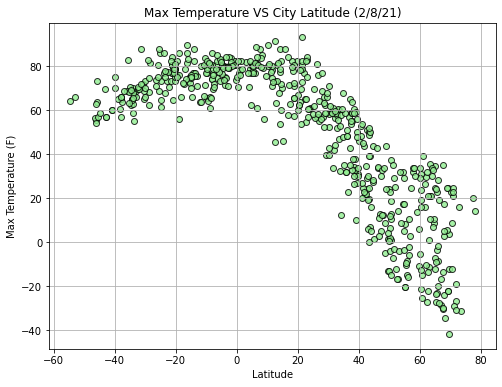

In [11]:
# temperature vs latitude
lat = weather_df['Lat']
temp = weather_df['Max Temp']

plt.figure(figsize=(8,6))
plt.scatter(lat, temp, color='lightgreen', edgecolor='black', alpha=.8)

plt.title('Max Temperature VS City Latitude (2/8/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.grid(True)

plt.show()

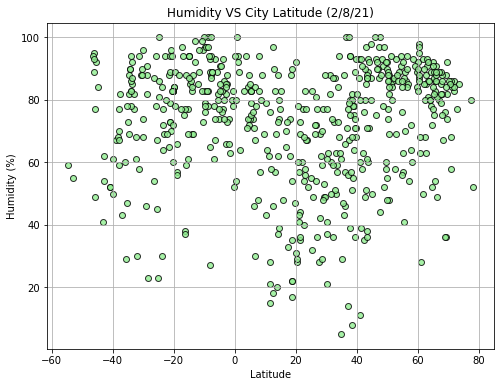

In [12]:
# humidity vs latitude
humid = weather_df['Humidity']

plt.figure(figsize=(8,6))
plt.scatter(lat, humid, color='lightgreen', edgecolor='black', alpha=.8)

plt.title('Humidity VS City Latitude (2/8/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid(True)

plt.show()

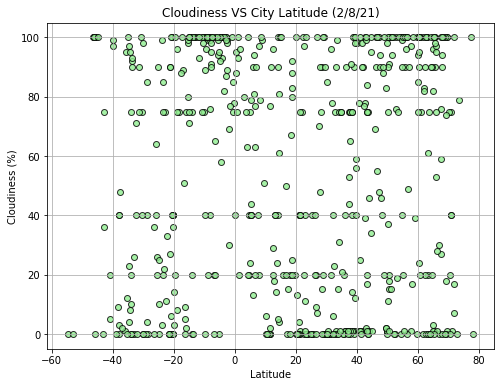

In [13]:
# cloudiness vs latitude
clouds = weather_df['Cloudiness']

plt.figure(figsize=(8,6))
plt.scatter(lat, clouds, color='lightgreen', edgecolor='black', alpha=.8)

plt.title('Cloudiness VS City Latitude (2/8/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid(True)

plt.show()